## Logistic Regression Exercise

In this exercise we will perform linear regression and logistic regression on the Titanic dataset. This dataset contains information about passenger characteristics, and whether each passenger survived the disaster.

First let's import the data:

In [1]:
import numpy as np
import pandas as pd
# Safe settings for Pandas.
pd.set_option('mode.chained_assignment', 'raise')
%matplotlib inline
import matplotlib.pyplot as plt
# Make the plots look more fancy.
plt.style.use('fivethirtyeight')
# Optimization function
from scipy.optimize import minimize
import statsmodels.api as sm

# importing the data
titanic = pd.read_csv('https://raw.githubusercontent.com/matthew-brett/cfd2020/master/data/titanic_clean.csv')

titanic.head(10)

,name,gender,age,class,embarked,country,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,Southampton,United States,7.1100,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,Southampton,United States,20.0500,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,Southampton,United States,20.0500,no
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,Southampton,England,20.0500,yes
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,Southampton,Norway,7.1300,yes
5,"Abelseth, Mr. Olaus Jørgensen",male,25.0,3rd,Southampton,United States,7.1300,yes
6,"Abelson, Mr. Samuel",male,30.0,2nd,Cherbourg,France,24.0000,no
7,"Abelson, Mrs. Hannah",female,28.0,2nd,Cherbourg,France,24.0000,yes
8,"Abī-Al-Munà, Mr. Nāsīf Qāsim",male,27.0,3rd,Cherbourg,Lebanon,18.1509,yes
9,"Abrahamsson, Mr. Abraham August Johannes",male,20.0,3rd,Southampton,Finland,7.1806,yes


# Linear Regression with one predictor

We are going to predict `survived` from `fare`. Were passengers who paid a higher fare more likely to survive? 

First, let's see how well a linear regression model does at predicting `survived` from `fare`.


*Question 1:*

Create a dummy variable for `survived` and add it to the `titanic` dataframe. We will treat `survived == 'yes'` as the event of interest, so give this the label `1`. Label `survived == 'no'` with a `0`:

In [2]:
titanic['survived_dummy'] = ...

# do not delete the code below this point
# show the dataframe
titanic

,name,gender,age,class,embarked,country,fare,survived,survived_dummy
0,"Abbing, Mr. Anthony",male,42.0,3rd,Southampton,United States,7.1100,no,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,Southampton,United States,20.0500,no,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,Southampton,United States,20.0500,no,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,Southampton,England,20.0500,yes,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,Southampton,Norway,7.1300,yes,1
...,...,...,...,...,...,...,...,...,...
1208,"Yvois, Miss. Henriette",female,24.0,2nd,Southampton,France,13.0000,no,0
1209,"Zakarian, Mr. Mapriededer",male,22.0,3rd,Cherbourg,Turkey,7.0406,no,0
1210,"Zakarian, Mr. Ortin",male,27.0,3rd,Cherbourg,Turkey,7.0406,no,0
1211,"Zenni, Mr. Philip",male,25.0,3rd,Cherbourg,Lebanon,7.0406,yes,1


*Question 2:*

Store `fare` as a separate variable:

In [3]:
fare = ...

# do not delete the code below this point
# show the fare data 
fare

0        7.1100
1       20.0500
2       20.0500
3       20.0500
4        7.1300
         ...   
1208    13.0000
1209     7.0406
1210     7.0406
1211     7.0406
1212     7.1706
Name: fare, Length: 1213, dtype: float64

*Question 3:*

Now, store `survived_dummy` as a separate variable:

In [4]:
survived_dummy = ...

*Question 4:*

To get a graphical idea of how `fare` relates to `survived`, let's plot them together.

Create a scatterplot with `fare` on the x axis and `survived_dummy` on the y axis:

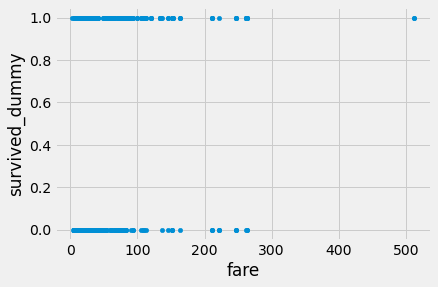

In [5]:
titanic.plot(...

*Question 5:*

Do you think it looks like there is a relationship between these two variables? How would you describe the relationship? (Rememeber that `survived_dummy == 1` means the passenger survived, `survived_dummy == 0` means they did not).

Write your answer in the cell below:

#### Your answer here...

*Question 6:*

Before we investigate this relationship with linear regression, we will need a function to calculate the sum of squared error, for any given intercept and slope, when we predict `survived_dummy` from `fare`.

Write a function called `sos_error_for_minimize` to calculate the sum of squared error when predicting `survived_dummy` from `fare`. `sos_error_for_minimize` should take as its input a list containing an intercept and a slope:

*Hint: you may want to consult the 'Using minimize' page for a refresher on how to do this: https://matthew-brett.github.io/cfd2020/mean-slopes/using_minimize.html*


In [6]:
def sos_error_for_minimize(intercept_and_slope):
   
    intercept = intercept_and_slope[0]
    slope = ...
    predicted = ...
    error = ...
    return np.sum(...

*Question 7:*

Now use minimize to find the intercept and slope pair which minimizes the sum of the squared error when predicting `survived` from `fare`, using the `sos_error_for_minimize` function:

In [7]:
from scipy.optimize import minimize

lin_reg_one = minimize(...
                
# do not delete the code below this point
lin_reg_one

      fun: 273.3802825819739
 hess_inv: array([[ 5.97884899e-04, -5.74037813e-06],
       [-5.74037813e-06,  1.77462716e-07]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([0.31406464, 0.00226928])

*Question 8:*

Store the intercept and slope from `minimize` as separate variables. Call the intercept `lin_reg_one_intercept` and call the slope `lin_reg_one_slope`:

In [8]:
lin_reg_one_intercept = ...

lin_reg_one_slope = ...

# do not delete the code below this point
print('Intercept from minimize (linear regression) =', lin_reg_one_intercept)
print('Slope from minimize (linear regression) =', lin_reg_one_slope)

Intercept from minimize (linear regression) = 0.3140646382128085
Slope from minimize (linear regression) = 0.002269284538207536


*Question 9:*

Let's compare the intercept and slope from `minimize` to the intercept and slope we get from Statsmodels. Complete the code in the cell below to predict `survived` from `fare` using Statsmodels linear regression (check under `coef` on the model summary shown below the cell, and compare these to the intercept/slope from minimize):

*Hint: you may want to check the 'Simple and multiple regression' page, for a refresher on how to do this: https://matthew-brett.github.io/cfd2020/classification/single_multiple.html*

*Note: `smf.ols()` is one way of performing linear regression with Statsmodels; `ols` stands for 'ordinary least squares':*

In [9]:
import statsmodels.formula.api as smf

mod = smf.ols(..., data = ...)

mod = mod.fit()

mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         survived_dummy   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     64.27
Date:                Sat, 17 Apr 2021   Prob (F-statistic):           2.53e-15
Time:                        18:45:20   Log-Likelihood:                -817.49
No. Observations:                1213   AIC:                             1639.
Df Residuals:                    1211   BIC:                             1649.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3141      0.016     19.115      0.000       0.282       0.346
fare           0.0023      0.000      8.017      0.000       0.002       0.003
==============================================================================
Omnibus:                     6684.269   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.205
Skew:                           0.465   Prob(JB):                     2.45e-38
Kurtosis:                       1.399   Cond. No.                         69.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

How do the slope and intercept from Statsmodels compare to the ones we got from `minimize`?

In [10]:
# run this cell to view the intercept/slope we got from minimize
print('Intercept from minimize (linear regression) =', lin_reg_one_intercept)
print('Slope from minimize (linear regression) =', lin_reg_one_slope)

Intercept from minimize (linear regression) = 0.3140646382128085
Slope from minimize (linear regression) = 0.002269284538207536


*Question 10:*

Recall that, when we use linear regression to predict probabilities, the predicted probability is calculated from:

$
\text{predicted probability} = intercept + slope * \text{fare}
$

Use the intercept and slope we got from `minimize` to calculate the predicted probability of survival. Store the result in a variable called `predictions_lin_reg_one`:

In [11]:
predictions_lin_reg_one = ...

# do not delete the code below this point
predictions_lin_reg_one

0       0.330199
1       0.359564
2       0.359564
3       0.359564
4       0.330245
          ...   
1208    0.343565
1209    0.330042
1210    0.330042
1211    0.330042
1212    0.330337
Name: fare, Length: 1213, dtype: float64

*Question 11:*

Let's plot these predictions against the original data. Create the same scatterplot as you did above, with `fare` on the x axis and `survived_dummy` on the y axis. The code at the bottom of the cell will add the predicted probabilities from linear regression to the graph (in gold):

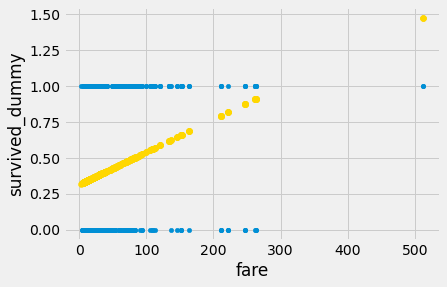

In [12]:
titanic.plot(...

# do not change the code below this point, it will add the linear regression predictions to the graph
plt.scatter(fare, predictions_lin_reg_one, color = 'gold');

You can see from the graph that for a `fare` of around 500, our linear regression model predicts a probability of survival greater than 1.

Let's see if logistic regression does a better job.

# Logistic Regression with one predictor


Before we begin, let's do a brief recap of the difference between probability and odds ratios.

The output of the cell below shows some of the values from `class` column of the `titanic` dataframe. These values are stored in a variable called `some_class_data`:

In [13]:
# here are some of the elements of the 'class' column in the titanic dataframe
some_class_data = titanic['class'].loc[100:109]

some_class_data

100    2nd
101    3rd
102    2nd
103    2nd
104    2nd
105    2nd
106    1st
107    1st
108    2nd
109    1st
Name: class, dtype: object

*Question 12:*

In the `some_class_data` series, what is the probability of a passenger being `1st` class? 

Remember that probability is $\frac{\text{number of observations of interest}}{\text{total number of observations}}$

Calculate the probability of being `1st` class in the `some_class_data` series. Store the result in a variable called `prob_first`.

*Hint: you can use `np.count_nonzero()` to count the number of `1st` class passengers in `some_class_data`. You can use the `len()` function to count the total number of observations in `some_class_data`*


In [14]:
prob_first = ...
prob_first

0.3

*Question 13:*

In the `some_class_data` series, what is the odds ratio of being `1st` class?

Remember that if $p$ is the probability of the event of interest, the odds ratio of the event of interest is $\frac{p}{1 - p}$

Calculate the odds ratio of being `1st` class in the `some_class_data` series, store the result in a variable called `odds_first`:

In [15]:
odds_first = ...
odds_first

0.4285714285714286

Remember that logistic regression predicts the *log odds ratio* of the event of interest.

To perform our logistic regression, let's define the functions we need.

Read over each line and make sure you understand what it is doing.

In [16]:
# define the functions we need

def inv_logit(y):
    """ Reverse logit transformation
    """
    odds_ratios = np.exp(y)  # Reverse the log operation.
    return odds_ratios / (odds_ratios + 1)  # Reverse odds ratios operation; return probabilities


def mll_logit_cost(intercept_and_slope, x, y):
    """ Cost function for maximum log likelihood

    Return minus of the log of the likelihood.
    """
    intercept, slope = intercept_and_slope
    
    # Make predictions for sigmoid.
    predicted_log_odds = intercept + slope * x
    pp_of_1 = inv_logit(predicted_log_odds)
    
    # Calculate predicted probabilities of the actual labels.
    pp_of_correct_label = y * pp_of_1 + (1 - y) * (1 - pp_of_1)
    
    # Use logs to calculate log of the likelihood
    log_likelihood = np.sum(np.log(pp_of_correct_label))
    
    # Ask minimize to find maximum by adding minus sign.
    return -log_likelihood

*Question 14:*

Use `minimize` to find the intercept and slope pair which gives the smallest negative log likelihood, when we predict `survive_dummy` from `fare`. Store the results in a variable called `log_reg_one`:

*Hint: begin with a guessed intercept and guessed slope both around 0.1, otherwise the function may fail...*

*Hint: the logistic regression cost function accepts more arguments than just the intercept and slope list, so you will need to use `args =` to give minimize the x and y values (in this case x = `fare` and y = `survived_dummy`)*

In [17]:
log_reg_one = minimize(..., args = ...)

log_reg_one

      fun: 777.3442248980926
 hess_inv: array([[ 5.96629571e-03, -7.90701961e-05],
       [-7.90701961e-05,  2.67342997e-06]])
      jac: array([-7.62939453e-06,  7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 68
      nit: 10
     njev: 17
   status: 0
  success: True
        x: array([-0.8187332 ,  0.01133774])

*Question 15:*

Store the intercept and slope as separate variables. Call the intercept `log_reg_one_intercept` and call the slope `log_reg_one_slope`:

In [18]:
log_reg_one_intercept = ...

log_reg_one_slope = ...

# do not alter the code below this point
print('Intercept from minimize (logistic regression) =', log_reg_one_intercept)
print('Slope from minimize (logistic regression) =', log_reg_one_slope)

Intercept from minimize (logistic regression) = -0.8187331954804361
Slope from minimize (logistic regression) = 0.011337735600729069


*Question 16:*

Let's compare these to the intercept and slope we get from Statsmodels.

Perform a logistic regression, using `smf.logit()`, to predict `survived_dummy` from `fare`:

In [19]:
mod = smf.logit(..., data = ...)

mod = mod.fit()

mod.summary()

Optimization terminated successfully.
         Current function value: 0.640844
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         survived_dummy   No. Observations:                 1213
Model:                          Logit   Df Residuals:                     1211
Method:                           MLE   Df Model:                            1
Date:                Sat, 17 Apr 2021   Pseudo R-squ.:                 0.04008
Time:                        18:45:20   Log-Likelihood:                -777.34
converged:                       True   LL-Null:                       -809.80
Covariance Type:            nonrobust   LLR p-value:                 7.819e-16
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8187      0.077    -10.581      0.000      -0.970      -0.667
fare           0.0113      0.002      6.957      0.000       0.008       0.015
==============================================================================
"""

How do the intercept and slope from Statsmodels compare to the ones we got from `minimize`?

In [20]:
# run this cell to show the intercept and slope we got from minimize
print('Intercept from minimize (logistic regression) =', log_reg_one_intercept)
print('Slope from minimize (logistic regression) =', log_reg_one_slope)

Intercept from minimize (logistic regression) = -0.8187331954804361
Slope from minimize (logistic regression) = 0.011337735600729069


*Question 17:*

We can use the intercept and slope from logistic regression to predict the log odds ratio of survival, using:

$ \text{predicted log odds ratio} = intercept + slope * \text{fare} $

Calculate the predicted log odds ratio of survival for each passenger. Store these predictions in a variable called `predictions_log_reg_one`:

In [21]:
predictions_log_reg_one = ...

predictions_log_reg_one

0      -0.738122
1      -0.591412
2      -0.591412
3      -0.591412
4      -0.737895
          ...   
1208   -0.671343
1209   -0.738909
1210   -0.738909
1211   -0.738909
1212   -0.737435
Name: fare, Length: 1213, dtype: float64

*Question 18:*

The predicted log odds ratios are hard to interpret. Convert them to probabilities, and store the probabilities in the `
predictions_log_reg_one` variable.

*Hint: the function you need to do this is above. You need to invert the logit transformation...*

In [22]:
predictions_log_reg_one = ...

*Question 19:*

Let's plot the probabilities, alongside the original data.

Create another scatterplot with `fare` on the x axis and `survived_dummy` on the y axis.

Then run the cell below. the code at the bottom of the cell will add the predicted probabilities from logistic regression to the graph (in gold).

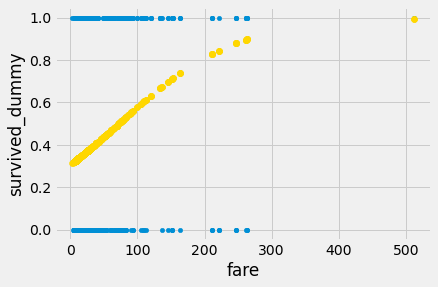

In [23]:
# plot the logistic reg probabilities

# use plot from earlier, run code below to add your predictions
titanic.plot(...


# do not alter the code below this point, it will add the predicted probabilities to the graph
plt.scatter(fare, predictions_log_reg_one, color = 'gold');

Do you think this model gives a better fit than the linear regression model? Write your answer in the cell below:

#### Your answer here...